By: Michał Marusiński

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\48660\Desktop\Development Workshop\preprocessed\preprocessed_pic_data\int_2022_12_16_10-29 S01_pic_000_1_LEFT_EYE")
data.head()

,time,pupil diameter [mm],trigger segmentStart,tigger segmentEnd,trigger info
0,0.000,21.023349,0.000000,4.955492,0.0
1,0.001,21.012304,4.956492,9.963961,40451.0
2,0.002,21.001232,9.964961,14.973196,10000.0
3,0.003,20.990136,14.974196,19.982306,41182.0
4,0.004,20.979020,19.983306,24.986037,10000.0


In [3]:
data.drop(data.loc[data['pupil diameter [mm]'].isna()].index, inplace = True)

In [4]:
q1 = np.quantile(data['pupil diameter [mm]'], 0.25)
q3 = np.quantile(data['pupil diameter [mm]'], 0.75)
iqr = q3 - q1
outliers_lower_line = q1 - 1.5 * iqr
outliers_upper_line = q3 + 1.5 * iqr
mean_value = data['pupil diameter [mm]'].mean()

C:\Users\48660\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


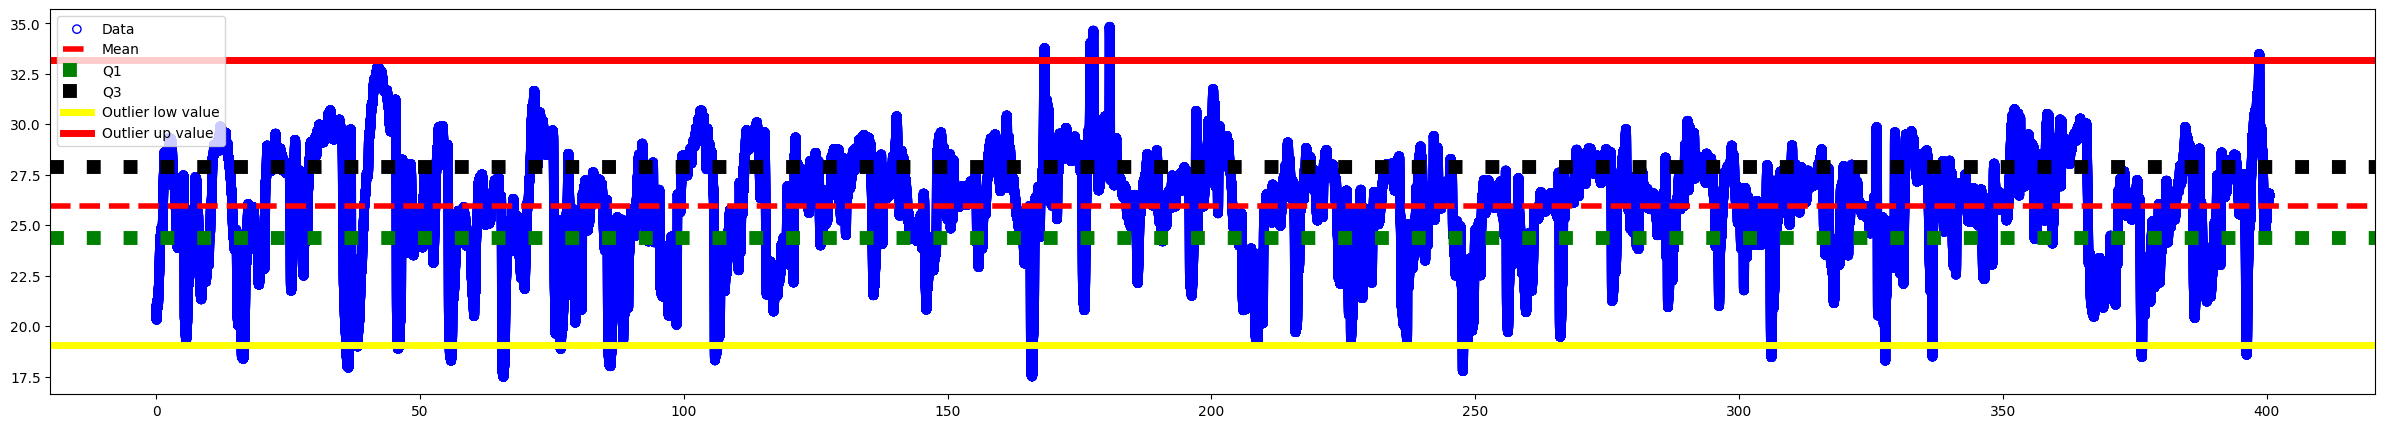

In [5]:
plt.figure(figsize=(30, 5))
plt.scatter(data['time'], data['pupil diameter [mm]'], label='Data', marker='o', facecolors='none', color = 'blue')
plt.axhline(mean_value, color='red', linestyle='--', linewidth=4, label='Mean')
plt.axhline(q1, color='green', linestyle=':', label='Q1', linewidth = 10)
plt.axhline(q3, color='black', linestyle=':', label='Q3', linewidth = 10)
plt.axhline(outliers_lower_line, color='yellow', linestyle='-', label='Outlier low value', linewidth = 5)
plt.axhline(outliers_upper_line, color='red', linestyle='-', label='Outlier up value', linewidth = 5)
plt.legend()
plt.show()



In [6]:

outliers_indices = data.loc[(data['pupil diameter [mm]'] < outliers_lower_line) | (data['pupil diameter [mm]'] > outliers_upper_line)].index
print(outliers_indices)
len(data.loc[(data['pupil diameter [mm]'] < outliers_lower_line) | (data['pupil diameter [mm]'] > outliers_upper_line)].index.to_list())

Index([ 16179,  16180,  16181,  16182,  16183,  16184,  16185,  16186,  16187,
        16188,
       ...
       398649, 398650, 398651, 398652, 398653, 398654, 398655, 398656, 398657,
       398658],
      dtype='int64', length=5613)


5613

Amount of outliers for this file is 5613
At this point we may try to:
* delete rows with outlier points
* switch the outliers with interpolation result values

Now we use simple interpolation to change outlier values

In [7]:
interpolated_data = data.copy()

for idx in outliers_indices:
    left_idx = idx - 1
    right_idx = idx + 1
    while left_idx in outliers_indices:
        left_idx -= 1
    left_value = data.loc[left_idx, 'pupil diameter [mm]']
    while right_idx in outliers_indices:
        right_idx += 1
    right_value = data.loc[right_idx, 'pupil diameter [mm]']
    interpolated_value = np.interp(idx, [left_idx, right_idx], [left_value, right_value])
    interpolated_data.loc[idx, 'pupil diameter [mm]'] = interpolated_value


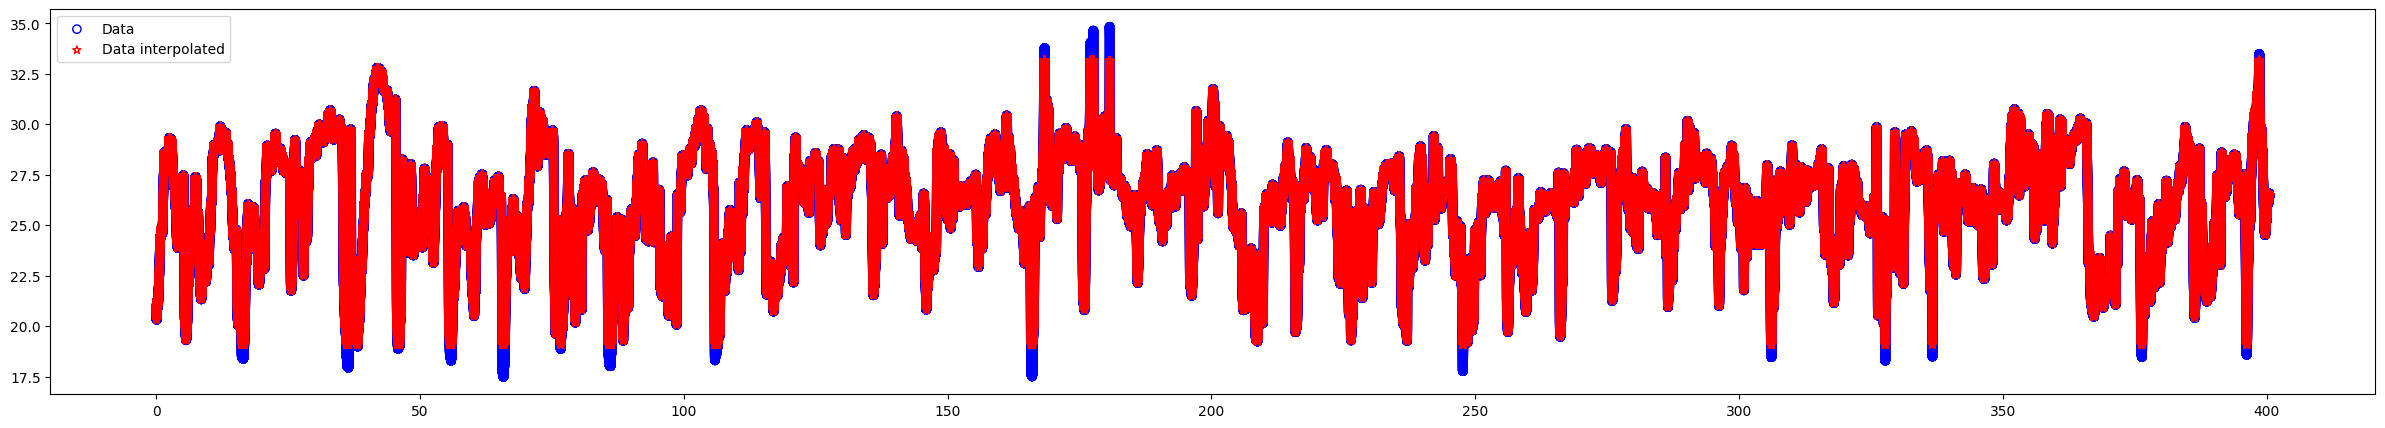

In [10]:
plt.figure(figsize=(30, 5))
plt.scatter(data['time'], data['pupil diameter [mm]'], label='Data', marker='o', facecolors='none', color = 'blue')
plt.scatter(data['time'], interpolated_data['pupil diameter [mm]'], label='Data interpolated', marker='*', facecolors='none', color = 'red')
plt.legend()
plt.show()

In [9]:
len(interpolated_data.loc[(interpolated_data['pupil diameter [mm]'] < outliers_lower_line) | (interpolated_data['pupil diameter [mm]'] > outliers_upper_line)].index.to_list())


0

As we see, it worked - **hooray**!!!